In [1]:
!nvidia-smi

Sun Dec 10 13:14:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080        Off | 00000000:01:00.0 Off |                  N/A |
|  0%   32C    P8               6W / 320W |      1MiB / 16376MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Dataloading

We load fastai text library. 

In [23]:
from fastai.text.all import *

The dataset we are going to use is stored in .tgz format in a private server. The organization, for untar_data to work has to be:

~~~
<namedataset>/<files>
~~~
    
Compressed then as \<namedataset.tgz\>.

In [3]:
path = untar_data("http://codeandbeer.org/mydata/IMDBDataset.tgz")

We only have one CSV file with the reviews.

In [24]:
path.ls()

(#1) [Path('/root/.fastai/data/IMDBDataset/IMDBDataset.csv')]

In [25]:
import pandas as pd

We load it using pandas.

In [6]:
df = pd.read_csv(path/"IMDBDataset.csv")


In [7]:
df

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses main...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his ...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've ...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with so...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of conta...",positive
...,...,...
49995,"I thought this movie did a down right good job. It wasn't as creative or original as the first, but who was expecting it to be. It was a whole lotta fun. the more i think about it the more i like it, and when it comes out on DVD I'm going to pay the money for it very proudly, every last cent. Sharon Stone is great, she always is, even if her movie is horrible(Catwoman), but this movie isn't, this is one of those movies that will be underrated for its lifetime, and it will probably become a classic in like 20 yrs. Don't wait for it to be a classic, watch it now and enjoy it. Don't expect a ...",positive
49996,"Bad plot, bad dialogue, bad acting, idiotic directing, the annoying porn groove soundtrack that ran continually over the overacted script, and a crappy copy of the VHS cannot be redeemed by consuming liquor. Trust me, because I stuck this turkey out to the end. It was so pathe

## Train/valid split

We add a column to decide if that entry is part of the validation set or not, we split by 80/20 %

In [26]:
df['is_valid'] = df.index >= len(df) * 0.8

In [9]:
df.query("is_valid == True and sentiment == 'positive'")

,review,sentiment,is_valid
40005,"Hickory Dickory Dock was a good Poirot mystery. I confess I have not read the book, despite being an avid Agatha Christie fan. The adaptation isn't without its problems, there were times when the humour, and there were valiant attempts to get it right, was a little overdone, and the events leading up to the final solution were rather rushed. I also thought there were some slow moments so some of the mystery felt padded. However, I loved how Hickory Dickory Dock was filmed, it had a very similar visual style to the brilliant ABC Murders, and it really set the atmosphere, what with the dark ...",positive,True
40006,"""One Crazy Summer"" is the funniest, craziest (not necessarily the best), movie I have ever seen.<br /><br />Just when one crazy scene is done, another emerges. It never lets you rest. Just one thing after another. The soundtrack is great. The songs are the right ones for the scenes.<br /><br />It is also a clean movie. Little that is dirty in it.<br /><br />Of course, it has the story of the guys you wouldn't trust with your lunch money, taking up a challenge, and winning over people with more resources. Who'd want to see it if they failed? There is a serious side, in that parents and chil...",positive,True
40010,"""Mr. Bug Goes To Town"" was the last major achievement the Fleischer studios produced. The quality of the Superman series produced at the same time is evident in this extraordinary film.<br /><br />The music and lyrics by Frank Loesser and Hoagy Carmichael (with assistance by Flieshcer veteran Sammy Timberg are quite good, but not as much as the scoring of the picture by Leigh Harline who also scored Snow White for Disney. Harline's ""atmospheric music"" is superb, and a treat for the ears.<br /><br />The layout and staging of the picture was years ahead of it's time, and once again the Fleis...",positive,True
40011,"This is one of my two or three favorite Stooges shorts, and undoubtedly Christine McIntyre's best performance with the trio. She is good in a number of other shorts, but here she is absolutely brilliant. Her singing is not funny at all, in fact it is downright beautiful, but the plot is constructed in such a way that the singing enhances the humor rather than detracting from it. We listen to McIntyre sing the entirety of Voice of Spring no less than three times, but it never gets old, partly because we don't tire of her voice, and partly because it blends so well with the Stooges' antics. ...",positive,True
40013,"Of all the British imperialist movies like Four Feathers, Charge of the Light Brigade for example, this movie stands out as the cream of the crop. It reflects a time when ""the sun never set on the British Empire."" Get over it. I won't go into why because so many others have expressed the many reasons that makes this film great. I have visited the Alabama Hills and have photographed the pass through which the British marched and it remains as it was, unchanged by time and encroachment by man and vandals. And even though I know it's coming, seeing Din lying dead on a stretcher and when these...",positive,True
...,...,...,...
49983,"I loved it, having been a fan of the original series, I have always wondered what the back story would be - it didn't fail to delight me. I also love the fact that apart from Eric Stoltz I didn't recognise one person - this is refreshing, much like BSG. It has introduced me to a whole wealth of new talent - can't wait for the series to start airing. Well done to Ronald D. Moore and team - excellent job. The special effects, dialogue and acting were all spot on, and I felt emotionally tied up in the storyline. I know there are purists out there that will probably disagree with my assessment...",positive,True
49985,"Imaginary Heroes is clearly the best film of the year. It was a complete and utter joy to watch. I was riveted. The whole audience up at the Sunset Five was riveted, when the film ended no one moved, spoke, not

## Dataloader creation


We create the text dataloader from a DataFrame, specifying which columns fill each role (text, label, and validation).

In [27]:
dl = TextDataLoaders.from_df(df,
                            text_col='review',
                            label_col='sentiment',
                            valid_col='is_valid')

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [11]:
dl.show_batch()

,text,category
0,"xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german suplex by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",positive
1,"xxbos xxmaj films belonging to the "" film noir "" genre usually contain similar elements : a "" deus ex machina "" plot twist that drives the main character headlong into bedlam , a pretty but psychotic girl , a handsome but psychotic thug , lots of money , lots of brutality , and usually a denouement in the desert . xxmaj think "" high xxmaj sierra "" or "" white xxmaj heat . "" \n\n xxmaj there is plenty of hard - boiled bad film noir out there . xxmaj but when film noir is good , you ca n't take your eyes off the train wreck of human lives . \n\n xxmaj it is this latter tradition that "" blind xxmaj spot "" belongs to . xxmaj the film follows xxmaj danny xxmaj alton , a troubled teenager ( superbly played with depth , grace , emotional integrity",positive
2,"xxbos xxup n.b . : xxmaj spoilers within . xxmaj assigning an artistic director to an operatic production naturally and inevitably means you are going to get a piece of that director 's mind . xxmaj but directing a xxmaj wagner opera is an especially tricky task , as he was perhaps the most explicit opera composer in terms of what things should look like and how they should unfold . hans - jurgen xxmaj syberberg loads this filming of "" parsifal , "" xxmaj wagner 's final masterpiece , with enough extraneous ideas to cause it to nearly burst at the seams . xxmaj you get more than a piece of the director : you get the whole xxunk hog and then some . xxmaj syberberg is to be admired for his penchant for tearing back the covers on the uglier aspects of xxmaj german history . xxmaj but",negative
3,"xxbos xxmaj some people drift through life , moving from one thing or one person to the next without batting an eye ; others latch on to a cause , another person or a principle and remain adamant , committed to whatever it is-- and figuratively or literally they give their word and stand by it . xxmaj but we 're all different , ` made of different clay , ' as one of the characters in this film puts it , which is what makes life so interesting . xxmaj some people are just plain crazy , xxunk and maybe that 's the way you have to be to live among the masses . xxmaj who knows ? xxmaj who knows what it takes to make xxunk life-- work ? xxmaj writer / director xxmaj lisa xxmaj krueger takes a shot at it , using a light approach to",positive
4,"xxbos xxmaj as i expected would happen , too many reviews of this film ( from professionals and amateurs alike ) have focused as much if not more on the film 's ideology . xxmaj that 's because xxmaj the xxmaj sea xxmaj inside ( aka xxmaj mar adentro ) is a film about euthanasia . xxmaj specifically , it 's a true story about an infamous xxmaj galician named xxmaj ramón xxmaj sampedro , who fought for many years for the right to assisted suicide , who was denied that right by the xxmaj spanish constitutional court , and who -- well , i do n't want to ruin the ending of the film for you . \n\n xxmaj the real life xxmaj sampedro catalyzed a national debate on euthanasia in xxmaj spain . xxmaj now with producer / director / writer / composer / editor xxmaj alejandro xxmaj",positive
5,"xxbos xxmaj it has been widely agr

## Neural network creation

We create our learner (neural network), starting from a LSTM model (recurrent network with decaying memory).

In [28]:
learn = text_classifier_learner(dl, AWD_LSTM, drop_mult = 0.5, metrics=accuracy)

In [29]:
learn.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(52000, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(52000, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0-2): 3 x RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)
      )
      (1): LinBnDrop(
        (0): B

## Neural Network Training

We find the learning rate and we train the network

SuggestedLRs(valley=0.0014454397605732083)

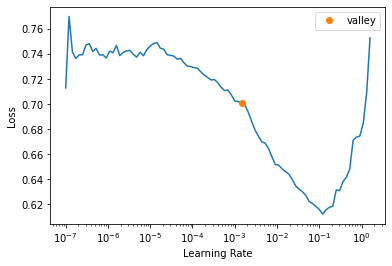

In [30]:
learn.lr_find()

In [31]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.448923,0.382410,0.827400,01:07
1,0.429260,0.359951,0.840800,01:07
2,0.411000,0.349755,0.843800,01:07
3,0.404411,0.337847,0.854800,01:07
4,0.411831,0.335345,0.857000,01:07


We freeze the neural network, training only the lowest layers (the classifier part). This can help improve accuracy while keeping the language model part intact.

In [32]:
learn.freeze_to(-4)

In [33]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.245230,0.211085,0.917500,01:31
1,0.168842,0.179461,0.932200,01:31


## Testing with comments from amazon.

In [34]:
learn.predict('''This is my favorite Star Trek movie. This is my second purchase as the first one had trouble. Well I played the second cd and the same thing happened. This is not a criticism more of a question. When we get to the point where the baby is coming, the dialogue is non existent, only the music. Did anyone have this problem? I’m at a lost. Thank you ''')

('positive', tensor(1), tensor([0.0268, 0.9732]))

In [35]:
learn.predict('''I had this product before, but it got killed when my old DVD player died. I finally got around to ordering a new one since I have all the Star Trek movies but this one. I got it but hadn't tried to play it until this morning. This movie DVD disk is all wrong. It is jump all over the place and has never even played the beginning part of the movie. It is a total waste of my money. I am sure it isn't the DVD player because I put another Star Trek book in and it is playing like it is suppose to. So far it is playing the movie in the correct sequence. I thought I was getting the movie, but it isn't it, just jumps all over the place in no kind of order. Who would want to pay that kind of money for just parts of a movie''')

('negative', tensor(0), tensor([0.9922, 0.0078]))

In [36]:
learn.predict('''It's interesting the reviews for this are either all raves (mostly from younger fans, although a few fans of the original series recognize its quality) or rants (mostly from people who felt there was no need to "remake" or "reboot" the original) and yet the truth of the matter is somewhere in between.

Make no mistake about it -- this is an extremely competent, well-made action film that will keep you entertained as long as action films are your thing. The acting is first rate, and there are enough tributes to the original series and stars that it doesn't feel like they've forgotten their roots.

Indeed, my only problem with this film is that it takes about an hour before it gets past the cliches -- let's see, we have the boy who lost his father growing up into a rebel without a cause, who is damned if he will join the establishment, is hell bent on drinking and bedding any women of any color (including green) that comes along, and who only by chance decides to join the military to make a man out of himself. And even there he cheats and rankles at authority until the end, when his rebelliousness actually saves the day. Oh, yes, and we also have two men who fight each other tooth and nail until they suddenly realize they are going to be the best of friends. Never saw that one coming. Sigh.

The early going by-the-numbers script was so predictable that we could have skipped it completely were it not for the excellent performances of such minor stars as Karl Urban (as Bones) who completely steals the show from both Kirk and Spock in the early going, and Simon Pegg (Scotty) who steals the show in the latter half. It is the supporting cast that makes this fun to watch until the inevitable coming together of Kirk and Spock to form the greatest team in all of science fiction this side of Batman and Superman.

Oh, I'll buy the blu-ray when it comes out, and have fun rewatching it, but the REAL fun will come in about two years, when the obligatory sequel will be released and our cast and crew, newly minted, yet much as we have always known them, takes to the stars for what is sure to be a lot more excitement and action. Until then, this will do.
''')

('positive', tensor(1), tensor([0.1167, 0.8833]))

In [37]:
learn.predict('''Like most remakes, this one falls short of the original. The cast does make an admirable attempt in fulfilling the roles they are cast, but these are huge shoes to fill. It may be more appealing to those younger that haven't seen the original series, but if you've grown up with William Shatner, Leonard Nimoy, DeForest Kelly, James Doohan, Nichelle Nichols, George Takei, and Walter Koenig, it's hard to get used to a new group. However, for a younger audience, it may be very successful.''')

('negative', tensor(0), tensor([0.6697, 0.3303]))